In [48]:

# TASK 1 : LOAD DATASET + BASIC INSPECTION

# Importing Required  libraries
import pandas as pd
import numpy as np

# Loading my dataset 
df = pd.read_csv("cleaned_merged_heart_dataset.csv")


print("=== First 5 rows of dataset ===")
display(df.head())

# Shape of dataset (rows, columns)
print("\n=== Shape of dataset ===")
print(df.shape)

# Info about data types and non-null values
print("\n=== Dataset Information ===")
print(df.info())

# Check for missing values in each column
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Basic statistical summary
# Gives mean, median, min, max, std for numeric columns
print("\n=== Statistical Summary ===")
print(df.describe())


=== First 5 rows of dataset ===


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



=== Shape of dataset ===
(1888, 14)

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB
None

=== Missing Values ===
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang    

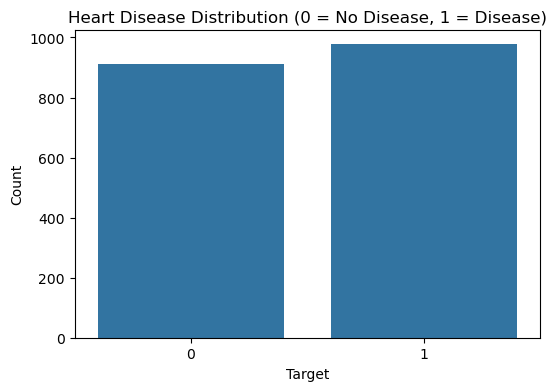

In [50]:
# EDA 1: Target Variable Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of target variable
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.title("Heart Disease Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


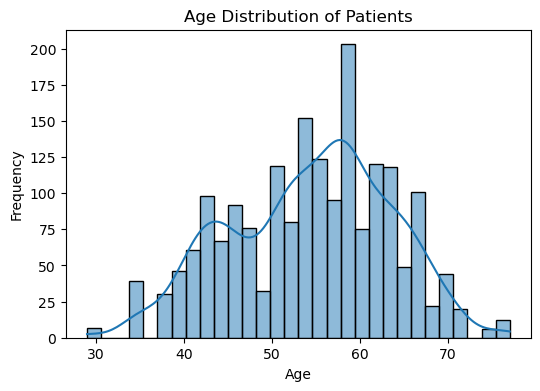

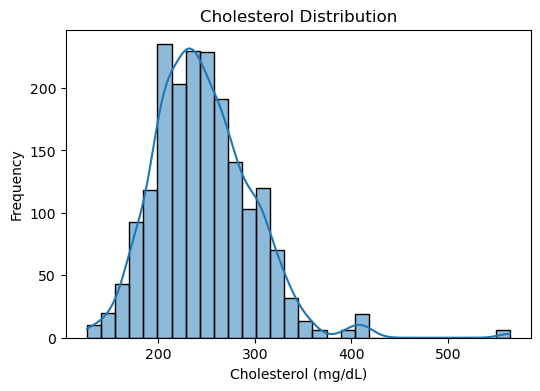

In [52]:

# EDA 2: Age Distribution


plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# EDA 3: Cholesterol Distribution

plt.figure(figsize=(6,4))
sns.histplot(df['chol'], bins=30, kde=True)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Frequency")
plt.show()


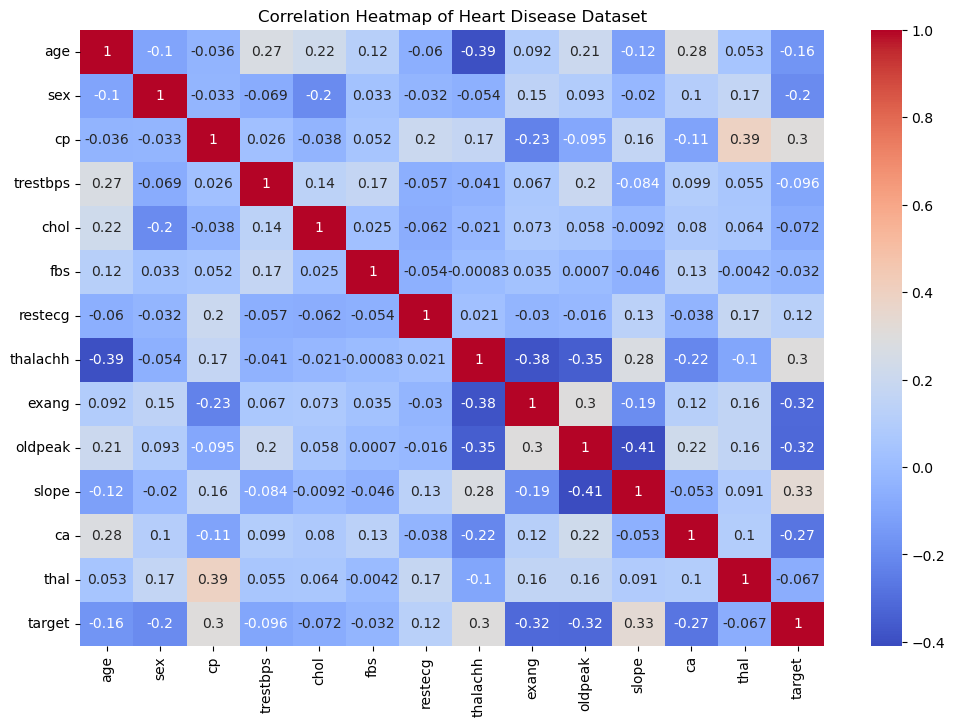

In [54]:

# EDA 4: Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


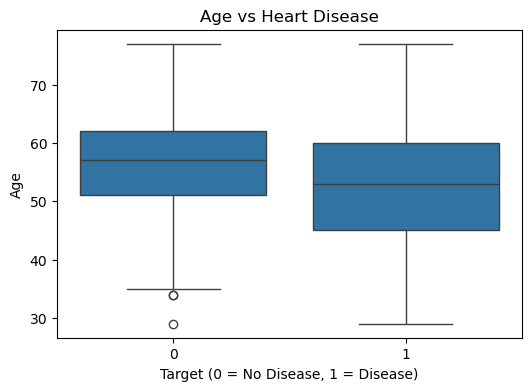

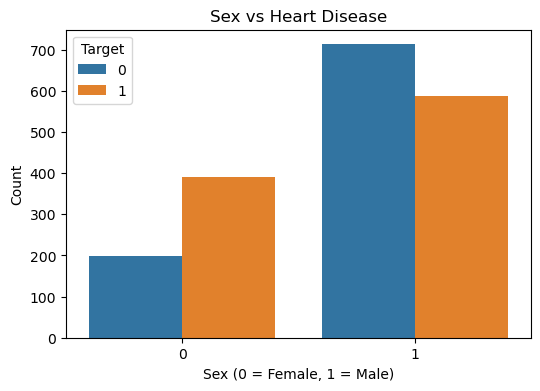

In [56]:

# EDA 5: Age vs Heart Disease (Boxplot)

plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Age")
plt.show()



# EDA 6: Sex vs Heart Disease

plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Target")
plt.show()


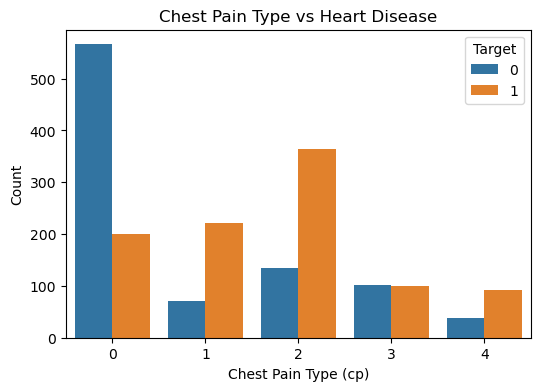

In [25]:

# EDA 7: Chest Pain Type vs Heart Disease

plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(title="Target")
plt.show()


In [46]:
# Hypothesis Test 1 : T-test for Cholesterol
# Test 1: Independent T-test
# Does cholesterol differ between people with heart disease vs without?
# H0: Mean cholesterol is same
# H1: Mean cholesterol is different

from scipy.stats import ttest_ind

# Splitting cholesterol into two groups
chol_disease = df[df['target'] == 1]['chol']
chol_no_disease = df[df['target'] == 0]['chol']

# Perform independent t-test
t_stat, p_value = ttest_ind(chol_disease, chol_no_disease)

print(" T-test: Cholesterol vs Heart Disease")
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: Reject H0 → Cholesterol levels differ significantly.")
else:
    print("Conclusion: Fail to Reject H0 → No significant difference.")


 T-test: Cholesterol vs Heart Disease
T-statistic: -3.1169934016436107
P-value: 0.001854610866393996
Conclusion: Reject H0 → Cholesterol levels differ significantly.


In [32]:

# TASK 4.1 : TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

# Features (X) = all columns except target
X = df.drop("target", axis=1)

# Target (y) = heart disease label
y = df["target"]

# Splitting dataset into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1510, 13)
Testing data shape: (378, 13)


In [34]:

# TASK 4.2 : LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression

# Creating model object
log_model = LogisticRegression(max_iter=1000)

# Training the model
log_model.fit(X_train, y_train)

print("Model training completed.")



Model training completed.


In [36]:
# TASK 4.3 : MODEL EVALUATION

from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = log_model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Print precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.746031746031746

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       182
           1       0.72      0.83      0.77       196

    accuracy                           0.75       378
   macro avg       0.75      0.74      0.74       378
weighted avg       0.75      0.75      0.74       378



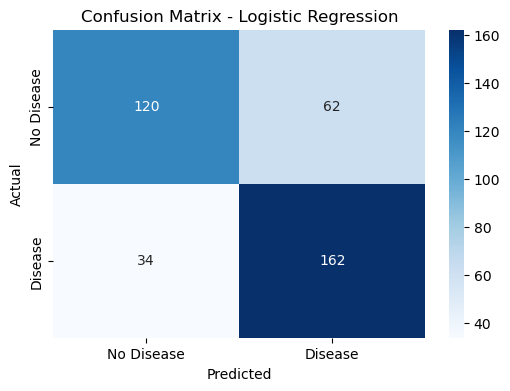

In [38]:
# TASK 4.4 : CONFUSION MATRIX GRAPH

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease","Disease"],
            yticklabels=["No Disease","Disease"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [40]:
# TASK 4.5 : RANDOM FOREST MODEL 

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9841269841269841

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.97      0.99      0.98       196

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378

